# Handson - Regression

In this hands-on session, you will practice applying regression analysis on a dataset to *predict* a variable based on one or several other variables. Regression Analysis is known as one of predictive methods.

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration

**Load the house price datast from `house_price.csv` and inspect its variables. You may use pandas profiling for this purpose.**

In [3]:
df = pd.read_csv('house_price.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**1. Use np.corr() method to calculate correlation matrix between every pair of variables in the dataset.**

**2. Visualize the correlation matrix with a heatmap. You may use Matplotlib or Seaborn.**

**3. Find the variable that is the most correlated with house price (`SalePrice` column).**

In [4]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


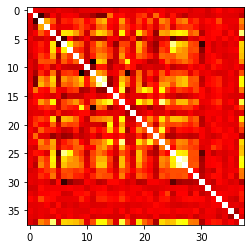

In [8]:
plt.imshow(df.corr(), cmap='hot')
plt.show()

In [24]:
saleprice_corr = df.corr().SalePrice.abs()
df.corr().SalePrice.iloc[(-saleprice_corr).argsort()[1:6]]


OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64

In [29]:
index = df.corr().SalePrice.iloc[(-saleprice_corr).argsort()[1:6]].index
df[index.to_list() + ['SalePrice']]

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,SalePrice
0,7,1710,2,548,856,208500
1,6,1262,2,460,1262,181500
2,7,1786,2,608,920,223500
3,7,1717,3,642,756,140000
4,8,2198,3,836,1145,250000
...,...,...,...,...,...,...
1455,6,1647,2,460,953,175000
1456,6,2073,2,500,1542,210000
1457,7,2340,1,252,1152,266500
1458,5,1078,1,240,1078,142125


**1. Find top 5 variables that are the most correlated with house price.**

**2. Draw a heatmap for correlation matrix between these 5 variables and house price.**


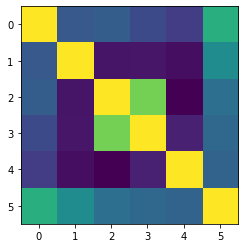

In [32]:
plt.imshow(df[index.to_list() + ['SalePrice']].corr())
plt.show()

## Univariate Regression Model

**1. Split the dataset into training set and valdation/test set. Your training set should be ~80% of your data.**

**2. Using sklearn.LinearRegression() model, fit a linear regression model on the training set to predict `SalePrice` only based on the variable that is most correlated with `SalePrice`.**

**3. Now, run your model on validation/test set and calculated the mean squared error. Report the error.**

In [42]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y , test_y = train_test_split(df.drop(columns=['SalePrice']),
                                                                      df.SalePrice,
                                                                      train_size=0.8,
                                                                      random_state=104,
                                                                      shuffle=True
                                                                      )
                                                                      

In [43]:
train_x[index].head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF
219,7,1248,2,438,1248
151,8,1710,3,866,1710
1103,6,1194,2,539,655
1356,5,892,1,264,864
892,6,1068,1,264,1059


In [116]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# ...
train_X = np.vstack([np.ones(train_x.shape[0]), train_x[index[0]].to_numpy()]).T
test_X = np.vstack([np.ones(test_x.shape[0]),test_x[index[0]].to_numpy()]).T
model = model.fit(train_X, train_y)

In [117]:
y_pred = model.predict(test_X)

**1. Draw a scatter plot for `SalePrice` and the variable you employed to predict `SalePrice`.**

**2. In this scatter plot, visualize the regression line.**

**3. Do you think this linear model could predict the price in a reasonably accurate way?**

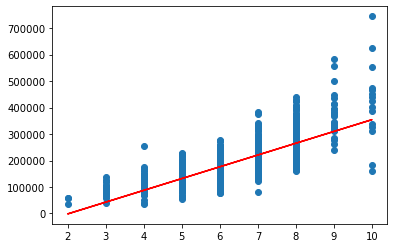

In [118]:
plt.scatter(train_x[index[0]], train_y)
plt.plot(train_x[index[0]], model.predict(train_X), color='r')
plt.show()

**Repeat the above analysis with a polynomial regression model with degree=2.**

In [170]:
poly_features.shape

(1168, 3)

In [171]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(
    # ... your data
    train_X[:, 1].reshape(-1, 1)
)
model = LinearRegression()
# ...
model = model.fit(poly_features, train_y)

In [172]:
model.predict(poly_features).shape

(1168,)

In [173]:
train_X[:, 1]

array([7., 8., 6., ..., 5., 4., 7.])

In [168]:
np.linspace(0.0, 10.0, 1168)

array([0.00000000e+00, 8.56898029e-03, 1.71379606e-02, ...,
       9.98286204e+00, 9.99143102e+00, 1.00000000e+01])

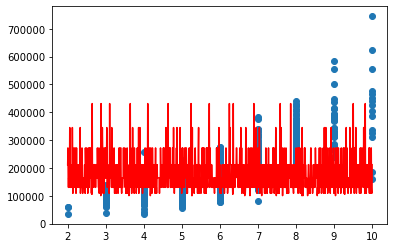

In [174]:

plt.scatter(train_X[:, 1], train_y)
plt.plot(np.linspace(2.0, 10.0, train_X[:, 1].shape[0]), model.predict(poly_features), color='r')
plt.show()

## Multivariate Regression Model

**1. Fit a linear regression model on training set to predict `SalePrice` based on the top 5 most correlated variables that you found earlier.**

**2. Predict house price on validation/test set.**

**3. Calculate the mean squeared error for the predictions of model. Do you think adding new variables to the model mitigated the error?**

In [ ]:
from sklearn.metrics import mean_squared_error
# ...